# Insert Title Here

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Data Proprocessing**](#3)
4. [**Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

## Introduction

Insert Image Here (by dragging it)

### Project Description

**Goal/Purpose:** 

What is this project about? What is the the goal/purpose of this project? Why is it important for someone to read this notebook?

<p>&nbsp;</p>

**Questions to be Answered:**

- Question 1
- Question 2
- Question 3...

<p>&nbsp;</p>

**Assumptions/Methodology/Scope:** 

Briefly describe assumptions, processing steps, and the scope of this project.

<p>&nbsp;</p>

### Data Description

**Content:** 

This dataset is a _(filetype) file of _(how many) data points which contains ___. 

<p>&nbsp;</p>

**Description of Attributes:** 

Here you can describe what each column represents.

| Column  | Description |
| :------ | :---------- |
| column1 | description1 |

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by _(. The original dataset was scraped by _) and the original source can be found on [website](https://website.link).

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [65]:
# Data manipulation
import datetime
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
from skimpy import skim, clean_columns

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

### 1. Loading Data

In [80]:
# # Load DataFrame
sku_first = pd.read_csv('data/first_group_sku.csv')
# sku_first['dates'].value_counts() 
sku_first['group'] = 1
sku_first['SKU'].value_counts() 

SKU
32950    149
78833     96
Name: count, dtype: int64

In [67]:
sku_second = pd.read_csv('data/second_group_sku.csv')
# sku_second.shape
sku_second['group'] = 2
sku_second['SKU'].value_counts() 

SKU
72784    491
38767    471
90611    462
10334    446
57561    430
17812    310
83329    286
68211    255
43678    254
64619    102
36096     95
98255     91
69997     56
Name: count, dtype: int64

In [68]:
sku_third= pd.read_csv('data/third_group_sku.csv')
# sku_third.shape
sku_third['group'] = 3
sku_third['SKU'].value_counts() 

SKU
84395    439
11050    434
89272    430
80308    380
60870    321
54404    265
49661    219
80631    163
19632     85
24125     45
Name: count, dtype: int64

### 2. Concat data: merged_data 

In [69]:
concated_skus = pd.concat([sku_first, sku_second, sku_third])
concated_skus

,dates,SKU,price_per_sku,num_purchases,group
0,2018-04-20,32950,422.975,3,1
1,2018-04-24,32950,429.275,3,1
2,2018-04-27,32950,435.100,3,1
3,2018-04-30,32950,NaN,1,1
4,2018-05-03,32950,440.950,2,1
...,...,...,...,...,...
2776,2019-12-17,89272,124.996,5,3
2777,2019-12-18,89272,124.996,6,3
2778,2019-12-19,89272,124.996,5,3
2779,2019-12-20,89272,124.996,6,3


### 3. Merge with dict

In [132]:
sku_dict = pd.read_csv('data/sku_dict.csv')
sku_dict.rename(columns={'sku_id':'SKU'}, inplace=True)
merged_concated_skus = concated_skus.merge(sku_dict, on=['SKU'], how = 'left')
# merged_concated_skus.head()
merged_concated_skus.info()

# nan_percentages = (merged_concated_skus.isna().mean() * 100).round(2)
# nan_percentages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dates            6775 non-null   object 
 1   SKU              6775 non-null   int64  
 2   price_per_sku    6699 non-null   float64
 3   num_purchases    6775 non-null   int64  
 4   group            6775 non-null   int64  
 5   fincode          6775 non-null   object 
 6   ui1_code         6775 non-null   object 
 7   ui2_code         6775 non-null   object 
 8   ui3_code         6775 non-null   object 
 9   vendor           6775 non-null   object 
 10  brand_code       6775 non-null   object 
 11  creation_date    6775 non-null   object 
 12  expiration_date  6775 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 688.2+ KB


## 4. Merge with Promo & Conc

In [149]:
promo_df = pd.read_csv('data/promo_1510002.csv')
conc_df = pd.read_csv('data/conc_df.csv')
conc_df.rename(columns={'price_per_sku': 'ret_net_price'}, inplace=True)
conc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SKU            3009 non-null   int64  
 1   year           3009 non-null   int64  
 2   week_num       3009 non-null   int64  
 3   ret_net_code   3009 non-null   int64  
 4   ret_net_price  3009 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 117.7 KB


### Ret_net

In [151]:
# Объедините данные по SKU, year, week_num и дате
merged_concated_skus['dates'] = pd.to_datetime(merged_concated_skus['dates'])

merged_conc_data = pd.merge(merged_concated_skus, conc_df, left_on=["SKU", merged_concated_skus['dates'].dt.year, merged_concated_skus['dates'].dt.isocalendar().week], right_on=["SKU", "year", "week_num"], how="inner")
merged_conc_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dates            15036 non-null  datetime64[ns]
 1   SKU              15036 non-null  int64         
 2   price_per_sku    15036 non-null  float64       
 3   num_purchases    15036 non-null  int64         
 4   group            15036 non-null  int64         
 5   fincode          15036 non-null  object        
 6   ui1_code         15036 non-null  object        
 7   ui2_code         15036 non-null  object        
 8   ui3_code         15036 non-null  object        
 9   vendor           15036 non-null  object        
 10  brand_code       15036 non-null  object        
 11  creation_date    15036 non-null  object        
 12  expiration_date  15036 non-null  object        
 13  year             15036 non-null  int64         
 14  week_num         15036 non-null  int64

### Promo

In [126]:
promo_df.head(5)

,year,week_num,SKU,discount
0,2019,1,90611,0.900
1,2019,2,10334,0.900
2,2019,3,68211,0.900
3,2019,4,10334,0.900
4,2019,5,72784,0.800


In [144]:
# Объедините данные по SKU, year, week_num и дате
# merged_concated_skus['dates'] = pd.to_datetime(merged_concated_skus['dates'])
# merged_concated_skus['dates']
# merged_conc_data = pd.merge(merged_concated_skus, conc_df, left_on=["SKU", merged_concated_skus['dates'].dt.year, merged_concated_skus['dates'].dt.isocalendar().week], right_on=["SKU", "year", "week_num"], how="left")
merged_conc_data = pd.merge(merged_conc_data, promo_df, left_on=["SKU", merged_conc_data['dates'].dt.year, merged_conc_data['dates'].dt.isocalendar().week], right_on=["SKU", "year", "week_num"], how="left")
merged_conc_data


,dates,year,week_num,SKU,price_per_sku,num_purchases,group,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date,year_x,week_num_x,ret_net_code,ret_net_price,year_y,week_num_y,discount
0,2018-04-20,2018,16,32950,422.975,3,1,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,2018,16,NaN,NaN,NaN,NaN,NaN
1,2018-04-24,2018,17,32950,429.275,3,1,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,2018,17,NaN,NaN,NaN,NaN,NaN
2,2018-04-27,2018,17,32950,435.100,3,1,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,2018,17,NaN,NaN,NaN,NaN,NaN
3,2018-04-30,2018,18,32950,NaN,1,1,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,2018,18,NaN,NaN,NaN,NaN,NaN
4,2018-05-03,2018,18,32950,440.950,2,1,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,2018,18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20057,2019-12-21,2019,51,89272,124.996,6,3,15,151,15100,1510003,UH2WWF,WKXRWTP7,2018-04-14,2200-01-01 00:00:00,2019,51,2.000,123.746,NaN,NaN,NaN
20058,2019-12-21,2019,51,89272,124.996,6,3,15,151,15100,1510003,UH2WWF,WKXRWTP7,2018-04-14,2200-01-01 00:00:00,2019,51,3.000,121.246,NaN,NaN,NaN
20059,2019-12-21,2019,51,89272,124.996,6,3,15,151,15100,1510003,UH2WWF,WKXRWTP7,2018-04-14,2200-01-01 00:00:00,2019,51,1.000,122.496,NaN,NaN,NaN
20060,2019-12-21,2019,51,89272,124.996,6,3,15,151,15100,1510003,UH2WWF,WKXRWTP7,2018-04-14,2200-01-01 00:00:00,2019,51,2.000,149.995,NaN,NaN,NaN


## Visualizations

In [145]:
# Convert the 'dates' column to a datetime object if it's not already
df = merged_conc_data.copy()
# df['dates'] = pd.to_datetime(aggregated_sec_df['dates'])

# df['dates'] = pd.to_datetime(df['dates'])

# Filter the data for SKU 32950
# sku_32950_data = df[df['SKU'] == 72784]
# sku_32950_data
# # Set the 'dates' column as the index
# sku_32950_data.set_index('dates', inplace=True)

# # Plot the number of purchases over time
# plt.figure(figsize=(12, 6))
# plt.plot(sku_32950_data['price_per_sku'], marker='o', linestyle='-')
# plt.title('Demand Over Time for SKU 32950')
# plt.xlabel('Date')
# plt.ylabel('Number of Purchases')
# plt.grid(True)
# plt.show()

,dates,year,week_num,SKU,price_per_sku,num_purchases,group,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date,year_x,week_num_x,ret_net_code,ret_net_price,year_y,week_num_y,discount
2664,2018-01-24,2018,4,72784,124.294,9,2,15,151,15100,1510002,AWD3XQ,79VL731U,2018-01-23,2200-01-01 00:00:00,2018,4,NaN,NaN,NaN,NaN,NaN
2665,2018-01-25,2018,4,72784,124.294,9,2,15,151,15100,1510002,AWD3XQ,79VL731U,2018-01-23,2200-01-01 00:00:00,2018,4,NaN,NaN,NaN,NaN,NaN
2666,2018-01-27,2018,4,72784,124.294,7,2,15,151,15100,1510002,AWD3XQ,79VL731U,2018-01-23,2200-01-01 00:00:00,2018,4,NaN,NaN,NaN,NaN,NaN
2667,2018-01-28,2018,4,72784,124.294,7,2,15,151,15100,1510002,AWD3XQ,79VL731U,2018-01-23,2200-01-01 00:00:00,2018,4,NaN,NaN,NaN,NaN,NaN
2668,2018-01-29,2018,5,72784,124.420,9,2,15,151,15100,1510002,AWD3XQ,79VL731U,2018-01-23,2200-01-01 00:00:00,2018,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,2019-12-15,2019,50,72784,133.191,5,2,15,151,15100,1510002,AWD3XQ,79VL731U,2018-01-23,2200-01-01 00:00:00,2019,50,NaN,NaN,NaN,NaN,NaN
3151,2019-12-17,2019,51,72784,134.710,6,2,15,151,15100,1510002,AWD3XQ,79VL731U,2018-01-23,2200-01-01 00:00:00,2019,51,NaN,NaN,NaN,NaN,NaN
3152,2019-12-18,2019,51,72784,134.710,6,2,15,151,15100,1510002,AWD3XQ,79VL731U,2018-01-23,2200-01-01 00:00:00,2019,51,NaN,NaN,NaN,NaN,NaN
3153,2019-12-19,2019,51,72784,134.710,5,2,15,151,15100,1510002,AWD3XQ,79VL731U,2018-01-23,2200-01-01 00:00:00,2019,51,NaN,NaN,NaN,NaN,NaN


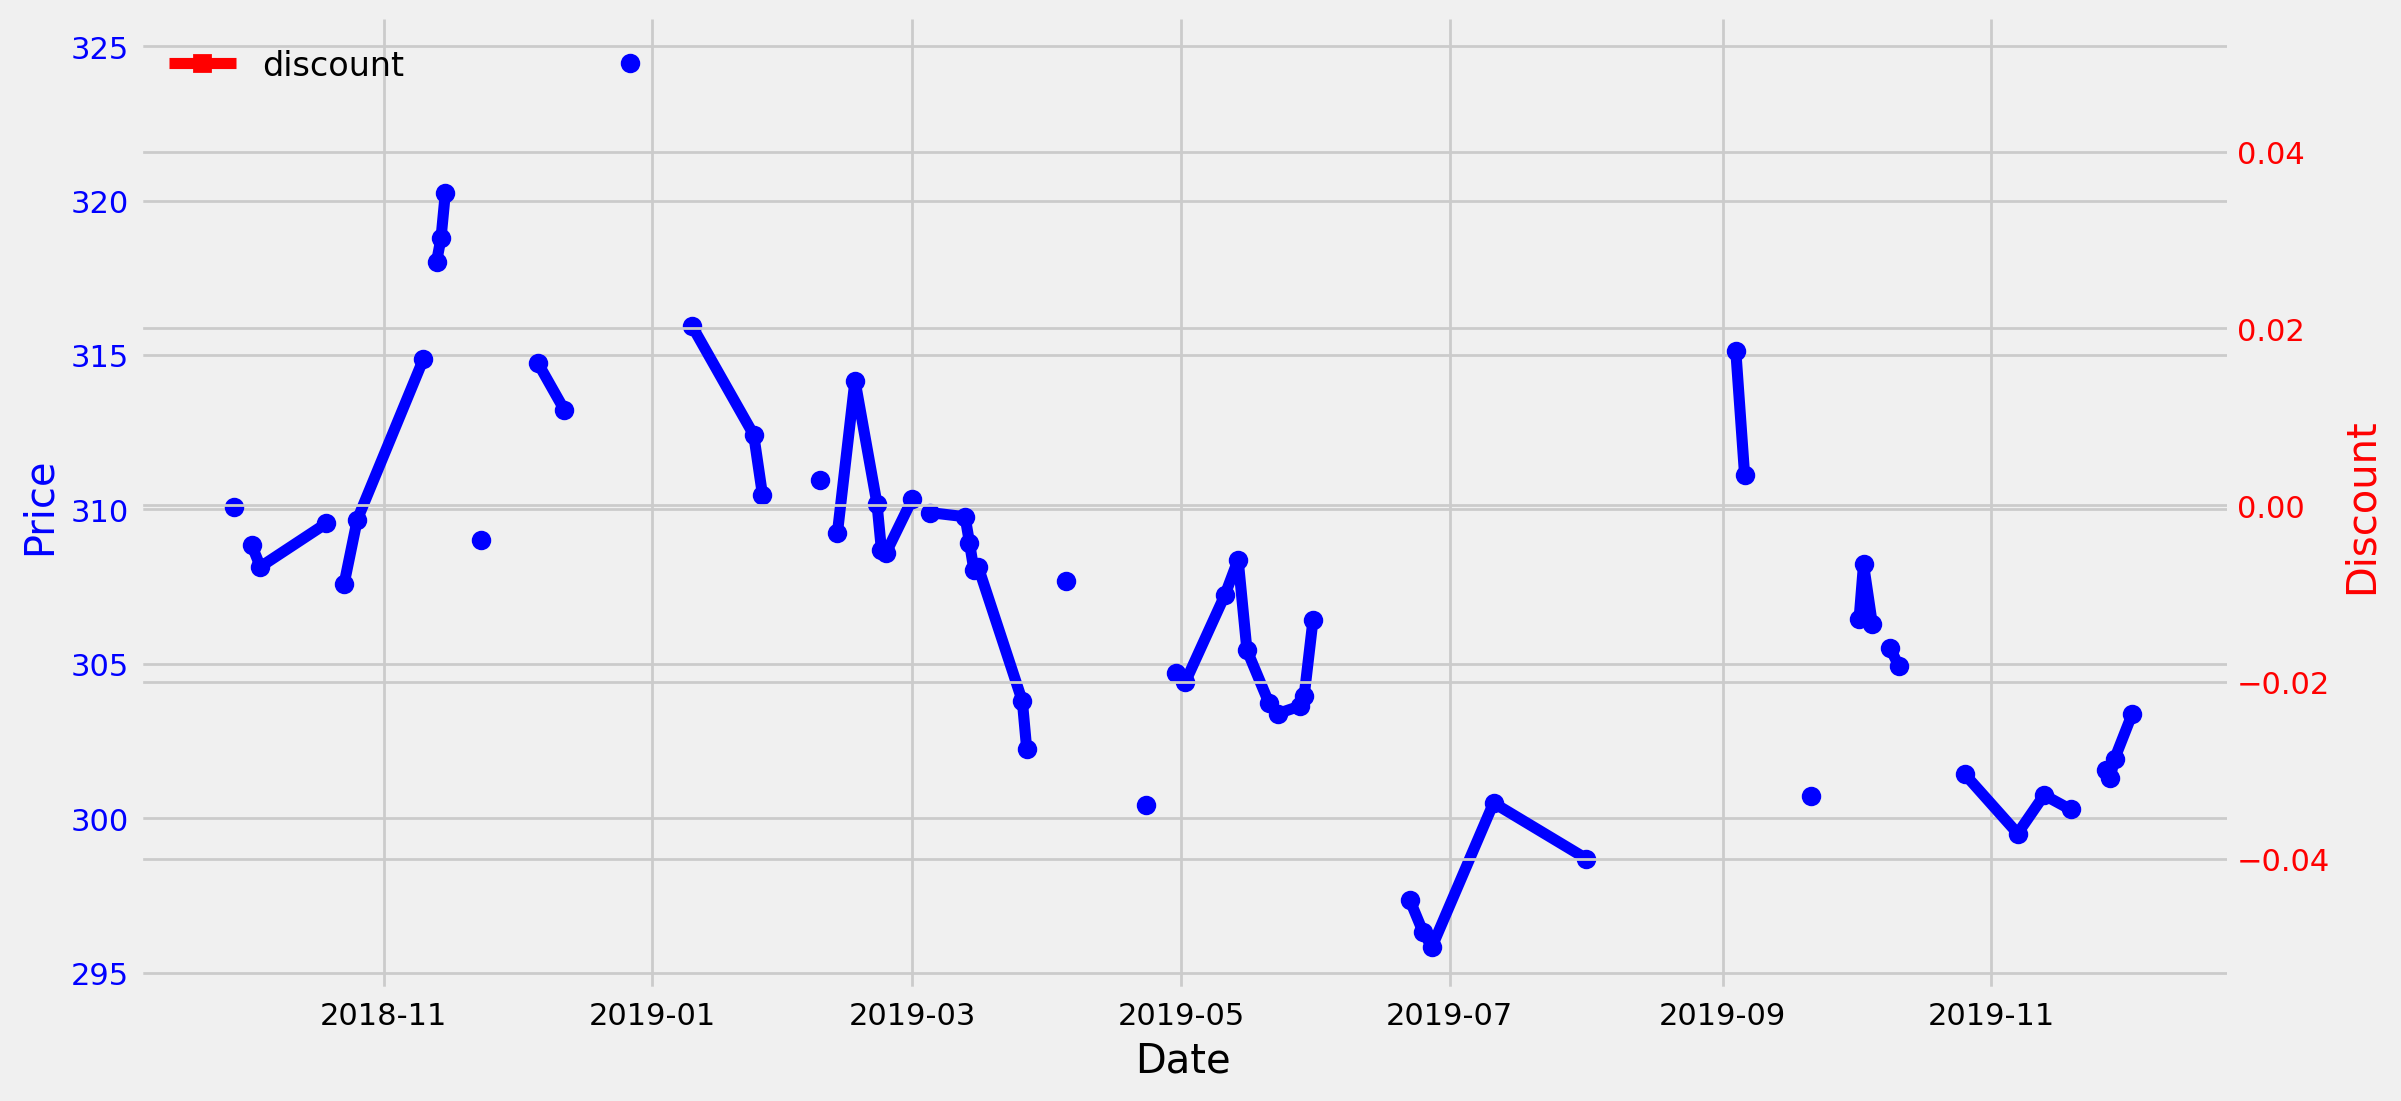

In [148]:
# Копируем данные
df = merged_conc_data.copy()
# Фильтруем данные для SKU 32950
sku_32950_data = df[df['SKU'] == 78833]

# Устанавливаем столбец 'dates' в качестве индекса
sku_32950_data.set_index('dates', inplace=True)
# Создаем новый график с двойной осью Y
fig, ax1 = plt.subplots(figsize=(12, 6))
# График для цены
ax1.plot(sku_32950_data.index, sku_32950_data['price_per_sku'], marker='o', linestyle='-', color='b', label='price_per_sku')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')
# Создаем вторую ось Y для скидки
ax2 = ax1.twinx()
ax2.plot(sku_32950_data.index, sku_32950_data['discount'], marker='s', linestyle='-', color='r', label='discount')
ax2.set_ylabel('Discount', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.legend(loc='upper left', frameon=False)

# Показываем график
plt.grid(True)
plt.show()

In [76]:

# def get_start_end_dates(input_df):
#     # Создайте столбец с полными датами
#     input_df['full_date'] = pd.to_datetime(input_df['year'].astype(str) + input_df['week_num'].astype(str) + '1', format='%Y%W%w')

#     # Используйте resample для создания недельных интервалов
#     weekly_data = input_df.resample('W', on='full_date').sum()

#     # Создайте две новые колонки с начальной и конечной датой недели в нужном формате
#     input_df['startDate'] = weekly_data.index.to_period('W').start_time.strftime('%d/%m/%Y')
#     input_df['endDate'] = weekly_data.index.to_period('W').end_time.strftime('%d/%m/%Y')
    
#     input_df.drop(columns = ['full_date'], axis = 1, inplace = True)

#     # Оставьте только необходимые колонки и сбросьте индекс
#     result_df = input_df #weekly_data[['startDate', 'endDate']].reset_index()

#     return result_df


In [77]:
sku_dict = pd.read_csv('data/promo_1510002.csv')
sku_dict = get_start_end_dates(sku_dict)
sku_dict.head()

,year,week_num,SKU,discount,startDate,endDate
0,2019,1,90611,0.900,07/01/2019,13/01/2019
1,2019,2,10334,0.900,14/01/2019,20/01/2019
2,2019,3,68211,0.900,21/01/2019,27/01/2019
3,2019,4,10334,0.900,28/01/2019,03/02/2019
4,2019,5,72784,0.800,04/02/2019,10/02/2019


In [78]:
conc_df = pd.read_csv('data/conc_df.csv')
conc_df = get_start_end_dates(conc_df)
conc_df.head()

ValueError: Length of values (52) does not match length of index (3009)

### Basic Data Exploration

In [ ]:
# # Show rows and columns count
# print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

In [ ]:
# df.head()

In [ ]:
# df.tail()

#### Check Data Types

In [ ]:
# # Show data types
# df.info()

- `column1`, `column2`, `column3` are **strings**.
- `column4` and `column5` are **floats**.
- `column6` is an **integer**.

`column3` should be a **datetime** type instead.

#### Check Missing Data

In [ ]:
# # Print percentage of missing values
# missing_percent = df.isna().mean().sort_values(ascending=False)
# print('---- Percentage of Missing Values (%) -----')
# if missing_percent.sum():
#     print(missing_percent[missing_percent > 0] * 100)
# else:
#     print('None')

#### Check for Duplicate Rows

In [ ]:
# # Show number of duplicated rows
# print(f"No. of entirely duplicated rows: {df.duplicated().sum()}")

# # Show duplicated rows
# df[df.duplicated()]

#### Check Uniqueness of Data

In [ ]:
# # Print the percentage similarity of values (the lower %, the better)
# num_unique = df.nunique().sort_values()
# print('---- Percentage Similarity of Values (%) -----')
# print(100/num_unique)

#### Check Data Range

In [ ]:
# # Print summary statistics
# df.describe(include='all')
# skim(df)

### Areas to Fix
**Data Types**
- [ ] Issue 1

**Missing Data**
- [ ] 

**Duplicate Rows**
- [ ]

**Uniqueness of Data**
- [ ]

**Data Range**
- [ ]

---

# 3

## Data Preprocessing

Here you can add sections like:

- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Engineering / Transformation

Use `assert` where possible to show that preprocessing is done.

### Rename Columns

In [ ]:
# # Rename columns to snake_case
# df = clean_columns(df, replace={})

In [ ]:
# # Rename columns
# columns_to_rename = {}
# df.rename(columns=columns_to_rename, inplace=True)

In [ ]:
# # Verify columns are renamed
# df.columns

### Drop Redundant Columns

In [ ]:
# # Check the proportion of the most frequent value in each column
# print('---- Frequency of the Mode (%) -----')
# mode_dict = {col: (df[col].value_counts().iat[0] / df[col].size * 100) for col in df.columns}
# mode_series = pd.Series(mode_dict)
# mode_series

In [ ]:
# # Show the value frequency of each column greater than the mode's threshold
# threshold = 80
# for col in mode_series[mode_series > threshold].index:
#     print(df[col].value_counts(dropna=False))
#     print()

In [ ]:
# # Drop columns (specify columns to drop)
# cols_to_drop = []
# df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [ ]:
# # Verify columns dropped
# assert all(col not in df.columns for col in cols_to_drop)

In [ ]:
# # Drop columns (specify column indices to drop)
# df.drop(df.columns[a:b], axis=1, inplace=True)

In [ ]:
# # Verify columns dropped
# assert all(col not in df.columns for col in df.columns[a:b])

In [ ]:
# # Drop columns (specify columns to keep)
# cols_to_keep = []
# df = df[cols_to_keep]

In [ ]:
# # Verify columns dropped
# assert all(col in df.columns for col in cols_to_keep)

### Changing Data Types

In [ ]:
# # Convert columns to the right data types
# df[col] = df[col].astype('string')
# df[col] = df[col].astype('int')
# df[col] = pd.to_datetime(df[col], infer_datetime_format=True)

# # Convert to categorical datatype
# col_cat = ptypes.CategoricalDtype(categories=['A', 'B', 'C'], ordered=True)
# df['col_cat'] = df['col_cat'].astype(col_cat)

In [ ]:
# # Verify conversion
# assert ptypes.is_string_dtype(df[col])
# assert ptypes.is_numeric_dtype(df[col])
# cols_to_check = []
# assert all(ptypes.is_datetime64_any_dtype(df[col]) for col in cols_to_check)

### Dropping Duplicates

In [ ]:
# # Drop entirely duplicated rows
# df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
# # Verify rows dropped
# assert df.duplicated().sum()==0

### Handling Missing Values

### Handling Unreasonable Data Ranges

In [ ]:
# # Drop affected rows
# df = df.loc[~((df['A'] == 0) | (df['B'] > 100))].reset_index()

In [ ]:
# # Verify rows dropped
# len(df)

### Feature Engineering / Transformation

In [ ]:
# # Get unique values of interested columns
# cols = []
# pd.unique(df[cols].values.ravel('k'))  # argument 'k' lists the values in the order of the cols 

In [ ]:
# # Create custom function
# # Google style docstrings
# # https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html
# def custom_function(param1: int, param2: str) -> bool:
#     """Example function with PEP 484 type annotations.

#     Args:
#         param1: The first parameter.
#         param2: The second parameter.

#     Returns:
#         The return value. True for success, False otherwise.

#     """

In [ ]:
# # Apply function to multiple columns
# cols = []
# df_updated = df.copy()
# df_updated[cols] = df_updated[cols].applymap(custom_function)

# # Create new aggregated boolean column
# df_updated['bool'] = df_updated[cols].any(axis=1, skipna=False)

---

# 4

## Data Analysis

Here is where your analysis begins. You can add different sections based on your project goals.

### Exploring `Column Name`

In [ ]:
# Code and visualization

**Observations**
- Ob 1
- Ob 2
- Ob 3

---

# 5

## Conclusion

### Insights 
State the insights/outcomes of your project or notebook.

### Suggestions

Make suggestions based on insights.

### Possible Next Steps
Areas to expand on:
- (if there is any)

---

# 6

## Epilogue

### References

This is how we use inline citation[<sup id="fn1-back">[1]</sup>](#fn1).

[<span id="fn1">1.</span>](#fn1-back) _Author (date)._ Title. Available at: https://website.com (Accessed: Date). 

> Use [https://www.citethisforme.com/](https://www.citethisforme.com/) to create citations.

### Versioning
Notebook and insights by (author).
- Version: 1.5.0
- Date: 2023-05-15

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b689e16b-e36c-4f8c-b17a-b3e876352669' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>